In [10]:
import pandas as pd
import pymc as pm
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2024)

data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/cookie_cats.csv")
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [11]:
# 1-Day Retention Model
with pm.Model() as model_1day:
    control_rate = pm.Beta("control_rate", alpha=1, beta=1)
    experiment_rate = pm.Beta("experiment_rate", alpha=1, beta=1)
    rate_difference = pm.Deterministic("rate_difference", control_rate - experiment_rate)

    control_observations = pm.Bernoulli("control_observations", control_rate, observed=data.loc[data['version'] == 'gate_30', 'retention_1'])
    experiment_observations = pm.Bernoulli("experiment_observations", experiment_rate, observed=data.loc[data['version'] == 'gate_40', 'retention_1'])

    trace_1day = pm.sample(2000, tune=1000, cores=2)

control_samples_1day = trace_1day.posterior["control_rate"].values.flatten()
experiment_samples_1day = trace_1day.posterior["experiment_rate"].values.flatten()
diff_samples_1day = trace_1day.posterior["rate_difference"].values.flatten()

Output()

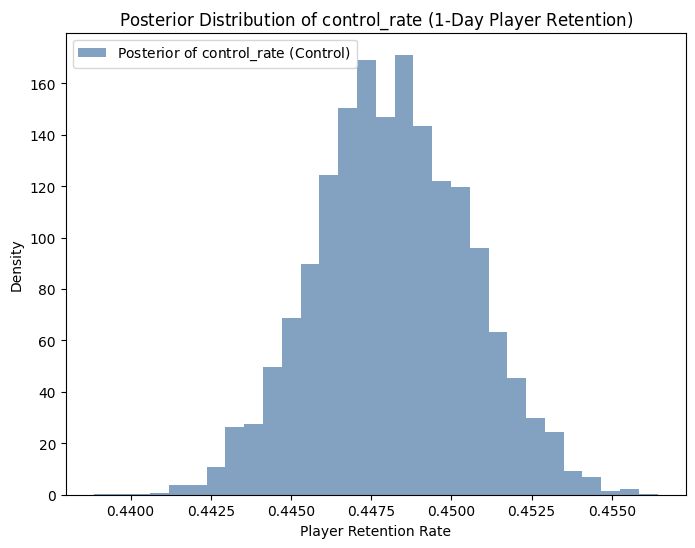

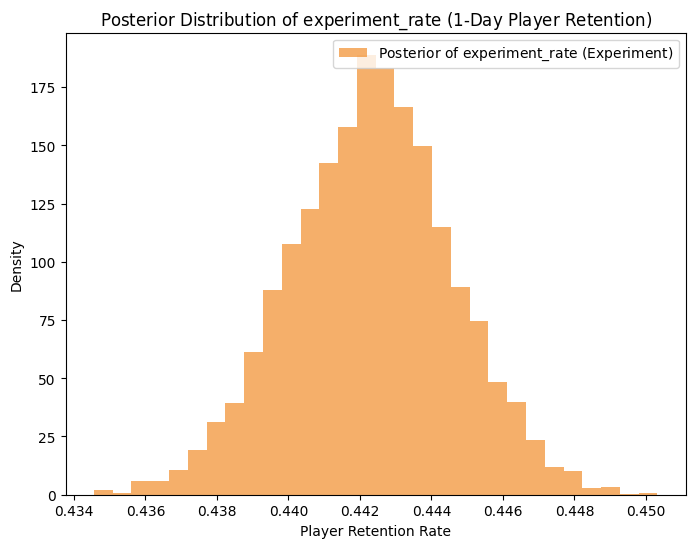

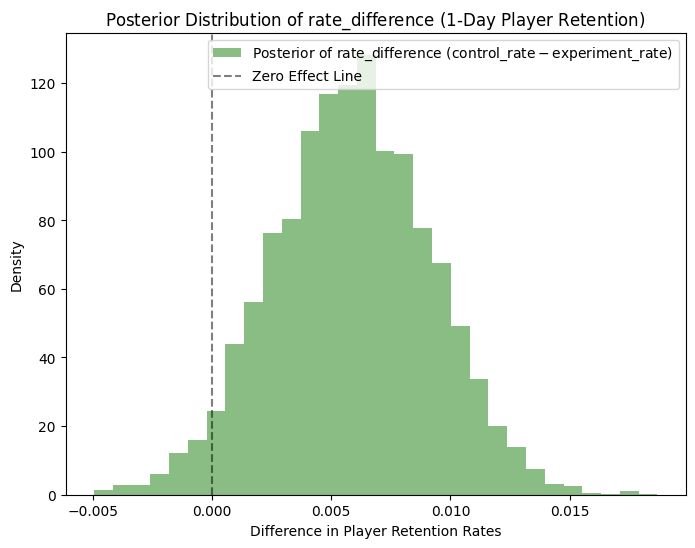

In [12]:
# 1-Day Retention Plots
plt.figure(figsize=(8, 6))
plt.hist(control_samples_1day, bins=30, color="#4e79a7", alpha=0.7, density=True, label="Posterior of $\\mathrm{control\\_rate}$ (Control)")
plt.title("Posterior Distribution of $\\mathrm{control\\_rate}$ (1-Day Player Retention)")
plt.xlabel("Player Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(experiment_samples_1day, bins=30, color="#f28e2b", alpha=0.7, density=True, label="Posterior of $\\mathrm{experiment\\_rate}$ (Experiment)")
plt.title("Posterior Distribution of $\\mathrm{experiment\\_rate}$ (1-Day Player Retention)")
plt.xlabel("Player Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(diff_samples_1day, bins=30, color="#59a14f", alpha=0.7, density=True, label="Posterior of $\\mathrm{rate\\_difference}$ ($\\mathrm{control\\_rate} - \\mathrm{experiment\\_rate}$)")
plt.axvline(0, color="black", linestyle="--", alpha=0.5, label="Zero Effect Line")
plt.title("Posterior Distribution of $\\mathrm{rate\\_difference}$ (1-Day Player Retention)")
plt.xlabel("Difference in Player Retention Rates")
plt.ylabel("Density")
plt.legend()
plt.show()

In [13]:
# 7-Day Retention Model
with pm.Model() as model_7day:
    control_rate = pm.Beta("control_rate", alpha=1, beta=1)
    experiment_rate = pm.Beta("experiment_rate", alpha=1, beta=1)
    rate_difference = pm.Deterministic("rate_difference", control_rate - experiment_rate)

    control_observations = pm.Bernoulli("control_observations", control_rate, observed=data.loc[data['version'] == 'gate_30', 'retention_7'])
    experiment_observations = pm.Bernoulli("experiment_observations", experiment_rate, observed=data.loc[data['version'] == 'gate_40', 'retention_7'])

    trace_7day = pm.sample(2000, tune=1000, cores=2)

control_samples_7day = trace_7day.posterior["control_rate"].values.flatten()
experiment_samples_7day = trace_7day.posterior["experiment_rate"].values.flatten()
diff_samples_7day = trace_7day.posterior["rate_difference"].values.flatten()

Output()

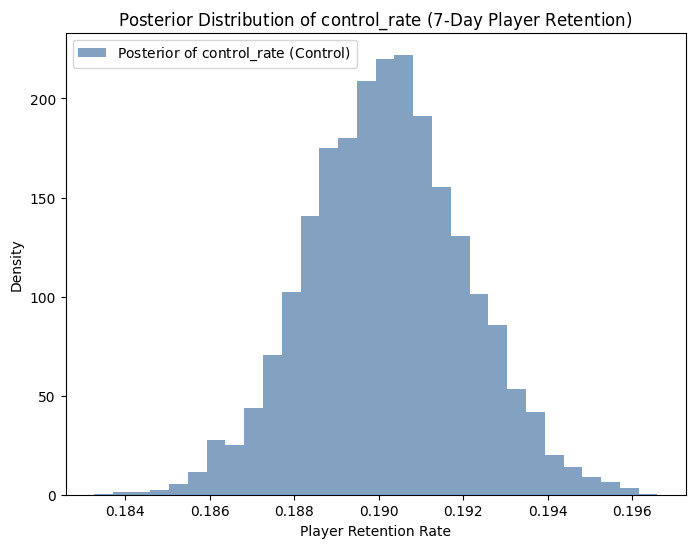

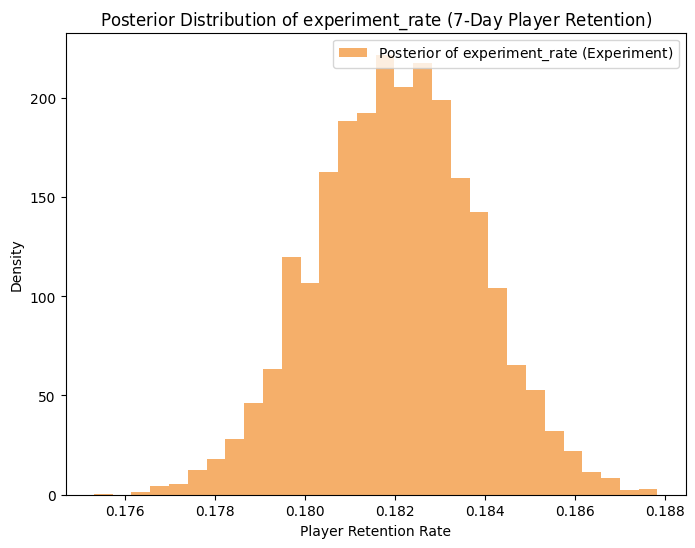

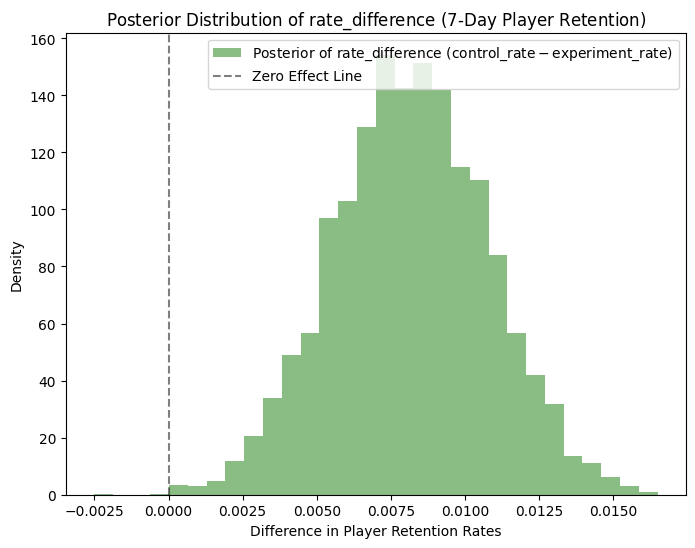

In [14]:
# 7-Day Retention Plots
plt.figure(figsize=(8, 6))
plt.hist(control_samples_7day, bins=30, color="#4e79a7", alpha=0.7, density=True, label="Posterior of $\\mathrm{control\\_rate}$ (Control)")
plt.title("Posterior Distribution of $\\mathrm{control\\_rate}$ (7-Day Player Retention)")
plt.xlabel("Player Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(experiment_samples_7day, bins=30, color="#f28e2b", alpha=0.7, density=True, label="Posterior of $\\mathrm{experiment\\_rate}$ (Experiment)")
plt.title("Posterior Distribution of $\\mathrm{experiment\\_rate}$ (7-Day Player Retention)")
plt.xlabel("Player Retention Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(diff_samples_7day, bins=30, color="#59a14f", alpha=0.7, density=True, label="Posterior of $\\mathrm{rate\\_difference}$ ($\\mathrm{control\\_rate} - \\mathrm{experiment\\_rate}$)")
plt.axvline(0, color="black", linestyle="--", alpha=0.5, label="Zero Effect Line")
plt.title("Posterior Distribution of $\\mathrm{rate\\_difference}$ (7-Day Player Retention)")
plt.xlabel("Difference in Player Retention Rates")
plt.ylabel("Density")
plt.legend()
plt.show()

In [16]:
print(f"Probability rate_difference > 0 (1-Day Retention): {(diff_samples_1day > 0).mean():.4f}")
print(f"Probability rate_difference > 0 (7-Day Retention): {(diff_samples_7day > 0).mean():.4f}")


Probability rate_difference > 0 (1-Day Retention): 0.9637
Probability rate_difference > 0 (7-Day Retention): 0.9995
